In [15]:
from contamination_detection import *
from matplotlib import pyplot as plt
import cv2
import pickle
from sklearn.ensemble import GradientBoostingClassifier

## Path of the image

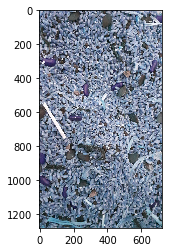

In [22]:
path = "/home/natalija/Documents/HackZurich/contamination_detection/src/contamination2.jpg"
img = cv2.imread(path)
plt.imshow(img)
plt.show()

## Is there contamination in this image? 

In [23]:
contamination_percentage = contamination(path)
print("There is {}% of the content that is contaminated".format(contamination_percentage))

There is 9.72319878472222% of the content that is contaminated


## Load trained model and take features for image

In [24]:
loaded_model = pickle.load(open("/home/natalija/Documents/HackZurich/contamination_detection/model.pkl", 'rb'))
features = vector_feature_generation(path)

In [25]:
result = loaded_model.predict(features)

In [26]:
def predict_grains(path): 
    loaded_model = pickle.load(open("/home/natalija/Documents/HackZurich/contamination_detection/model.pkl", 'rb'))
    features = vector_feature_generation(path)
    
    maping = {}
    maping[1] = "beans"
    maping[2] = "dried_bean"
    maping[3] = "fines"
    maping[4] = "grains"
    maping[5] = "lentils"
    maping[6] = "pumpkin"
    maping[7] = "stones"
    maping[8] = "straw"
    maping[9] = "quinoa"

    count = {}
    count[1] = 0
    count[2] = 0
    count[3] = 0
    count[4] = 0
    count[5] = 0
    count[6] = 0
    count[7] = 0
    count[8] = 0
    count[9] = 0

    for i in result:
        count[i] +=1
    result = ""
    for i in range(1,10): 
        if count[i] != 0 and i!=4: 
            result+=("{}% of the contaminated grains are {}/n".format(100/count[i], maping[i]))
    return result

In [27]:
for i in range(1,10): 
    if count[i] != 0 and i!=4: 
        print("{}% of the grains are {}".format(contamination_percentage/count[i], maping[i]))

0.486159939236111% of the grains are beans
1.6205331307870365% of the grains are lentils
0.11439057393790847% of the grains are pumpkin
2.430799696180555% of the grains are stones
0.42274777324879215% of the grains are straw
